In [3]:
#Librerias para ML

#Manejo de la base de datos
import pandas as pd
import numpy as np

#Escalar Variables
from sklearn.preprocessing import MinMaxScaler

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#Creación de modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

#Para graficas
import matplotlib.pyplot as plt
import seaborn as sns

#Private functions
from own_functions import residuos
from own_functions import comparisson
from own_functions import scorer

# 1. Cargando las BD

In [4]:
#Se crea un dataframe con los datos tratados
df = pd.read_csv('Train_prep_iter2.csv')

In [5]:
df.head(2)

,Barcelona_weather_id_Atmosphere,Barcelona_weather_id_Clear,Barcelona_weather_id_Clouds,Barcelona_weather_id_Drizzle,Barcelona_weather_id_Other,Barcelona_weather_id_Rain,Barcelona_weather_id_Thunderstorm,Madrid_weather_id_Atmosphere,Madrid_weather_id_Clear,Madrid_weather_id_Clouds,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,1,0,0,0,0,0,0,1,0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,0,1,0,0,0,0,0,0,1,0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


## 1.1 División de la base de datos en datos de entrada y salida

In [6]:
# Separamos de nuestros datos la variable de salida
output_name = ['load_shortfall_3h']

# Ya no se tienen datos categoricos y numericos, todos son numericos
# col_cat  = ['time', 'Madrid_weather_id', 'Barcelona_weather_id', 
#             'Seville_weather_id', 'Bilbao_weather_id']

# col_cat_test = ['time', 'Seville_pressure', 'Valencia_wind_deg'] #Solo para las graficas

# col_num  = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Seville_pressure', 'Valencia_wind_deg',
#        'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
#        'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
#        'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
#        'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h', 
#        'Seville_rain_1h', 'Bilbao_snow_3h',
#        'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
#        'Barcelona_rain_3h', 'Valencia_snow_3h','Bilbao_pressure', 
#        'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
#        'Valencia_temp_max', 'Valencia_temp',
#        'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
#        'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
#        'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
#        'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp',
#        'Madrid_temp_min']


In [7]:
# Separación de las variables

#BD completa
x = df.drop(columns = output_name)
y = df[output_name]

# 2. Datos de entrenamiento y prueba 

In [8]:
# División de los datos en train y test
#En este caso, el 80% de los datos se utilizarán para entrenar el modelo. 

#Para los datos normales
X_train, X_test, y_train, y_test = train_test_split(
                                        x,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# 3. Creación de los modelos

## 3.1 Regresor lineal

In [9]:
OLS_1 = LinearRegression()

## 3.2 Random Forest

In [10]:
# Creación del modelo randomForest con con 100 árboles y 5 niveles de profundidad
RF_1 = RandomForestRegressor(
            n_estimators = 100,
            criterion    = 'friedman_mse',
            max_depth    = 5,
            max_features = 1.0,
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 1234
         )

# 4. Entrenamiento

In [11]:
# Entrenamiento del modelo Regresor lineal
OLS_1.fit(X_train, y_train.ravel())

LinearRegression()

In [12]:
# Entrenamiento del modelo Random Forest
RF_1.fit(X_train, y_train.ravel())

RandomForestRegressor(criterion='friedman_mse', max_depth=5, n_jobs=-1,
                      random_state=1234)

## 4.1 Residuos 

In [13]:
#Reducción de dimensionalidad del dataset: se convierte en una dimensión
y_train_flat = y_train.flatten()

In [14]:
# Diagnóstico errores (residuos) regresor lineal
#Se realiza la predicción sobre los datos de entrenamiento
ols_train_predict = OLS_1.predict(X_train)
#Se calculan los residuos: diferencia entre la prediccion y el valor real en los datos de entreanamiento
ols_residuos  = ols_train_predict - y_train_flat

d:\10. Personal\Especialización UDEA\Modulo 11. Monografia\Iteraciones\2\own_functions.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
d:\10. Personal\Especialización UDEA\Modulo 11. Monografia\Codigo\.venv\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


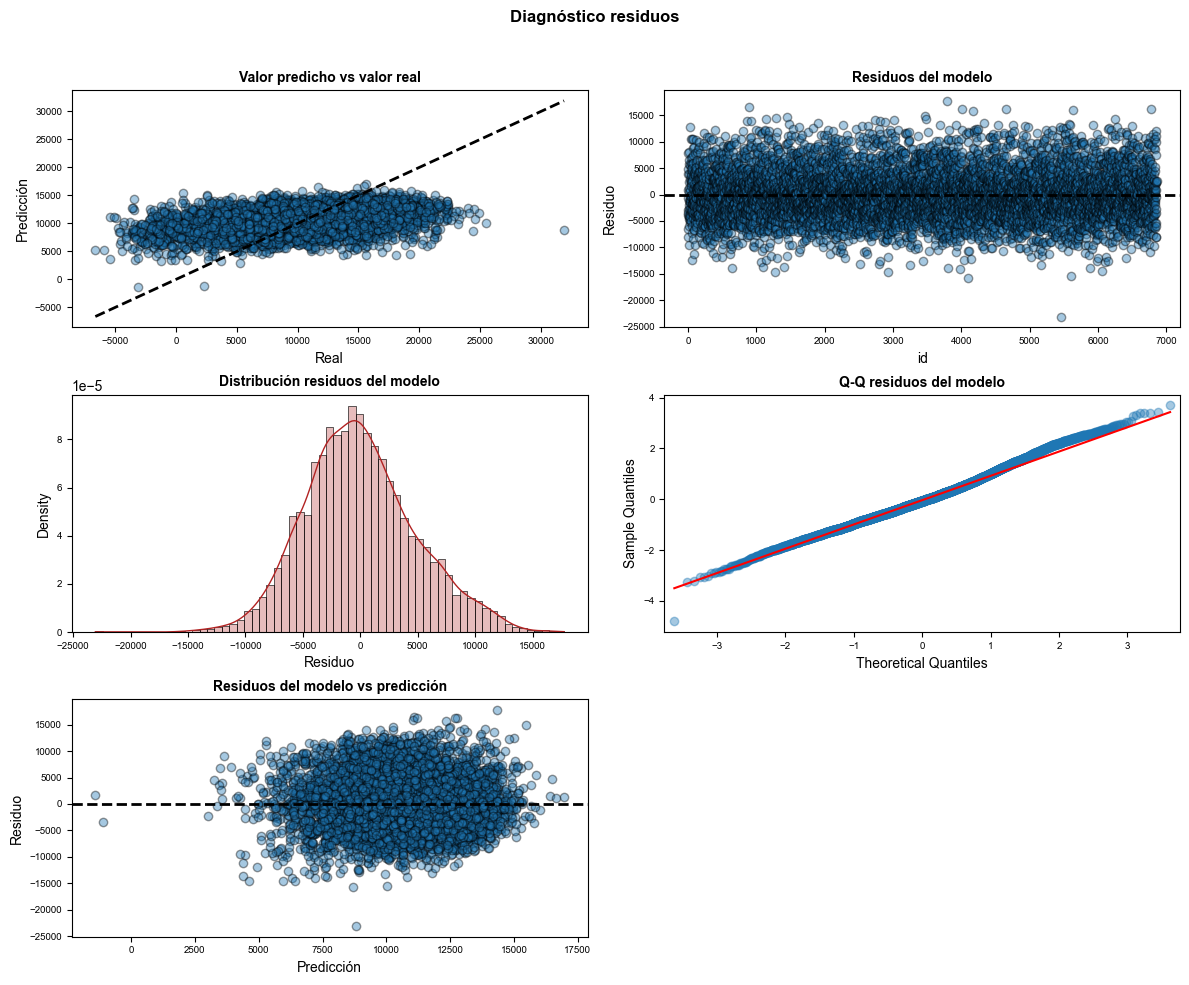

In [15]:
residuos(y_train_flat, ols_train_predict, ols_residuos)

In [16]:
# Diagnóstico errores (residuos) Random Forest
#Se realiza la predicción sobre los datos de entrenamiento
rf_train_predict = RF_1.predict(X_train)
#Se calculan los residuos: diferencia entre la prediccion y el valor real en los datos de entreanamiento 
rf_residuos  = rf_train_predict - y_train_flat

d:\10. Personal\Especialización UDEA\Modulo 11. Monografia\Iteraciones\2\own_functions.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
d:\10. Personal\Especialización UDEA\Modulo 11. Monografia\Codigo\.venv\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


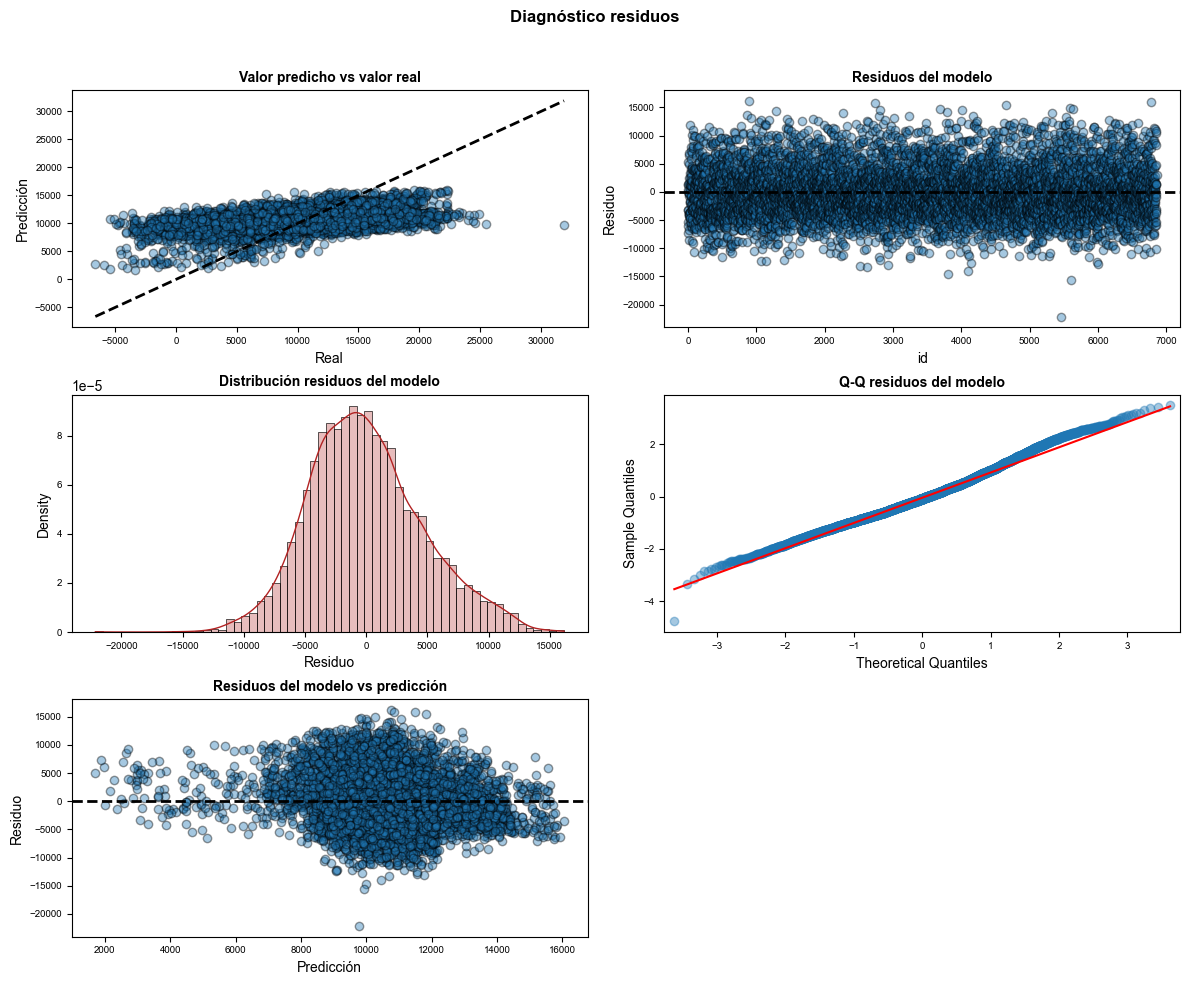

In [17]:
residuos(y_train_flat, rf_train_predict, rf_residuos)

# 5. Evaluación

## 5.1 Metricas

### 5.1.1 Regresores lineales

In [18]:
# Error de test del modelo 
Y_test_OLS_1 = OLS_1.predict(X_test)

results_OLS1 = scorer(y_test,Y_test_OLS_1,'Linear Regresor') 

El error MSE de test para el Linear Regresor es: 21832535.454527073
El error RMSE de test para el Linear Regresor es: 4672.529877328456
El error MAE de test para el Linear Regresor es: 3714.7923226433422
El error MedAE de test para el Linear Regresor es: 3109.5208333333003
El error MAPE de test para el Linear Regresor es: 1.2898413186954756
El error R2 de test para el Linear Regresor es: 0.15528896851273055


### 5.1.2 Random forest

In [19]:
# Error de test del modelo 
Y_test_RF_1 = RF_1.predict(X_test)

results_RF1 = scorer(y_test,Y_test_RF_1,'Random Forest')

El error MSE de test para el Random Forest es: 21925575.097320013
El error RMSE de test para el Random Forest es: 4682.475317320958
El error MAE de test para el Random Forest es: 3745.184310989085
El error MedAE de test para el Random Forest es: 3125.821174269233
El error MAPE de test para el Random Forest es: 1.342320613788103
El error R2 de test para el Random Forest es: 0.15168922111754035


## 5.2 Graficas

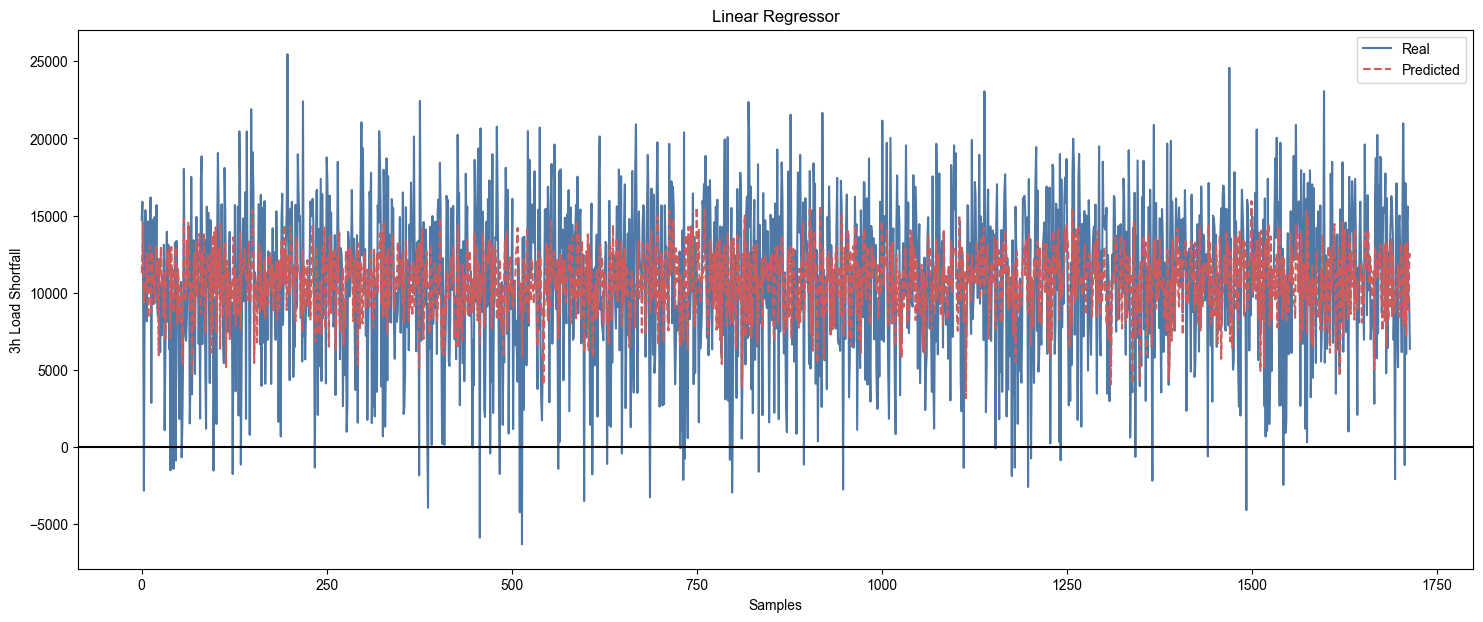

In [22]:
comparisson(y_test, Y_test_OLS_1, 'Linear Regressor',(18,7))

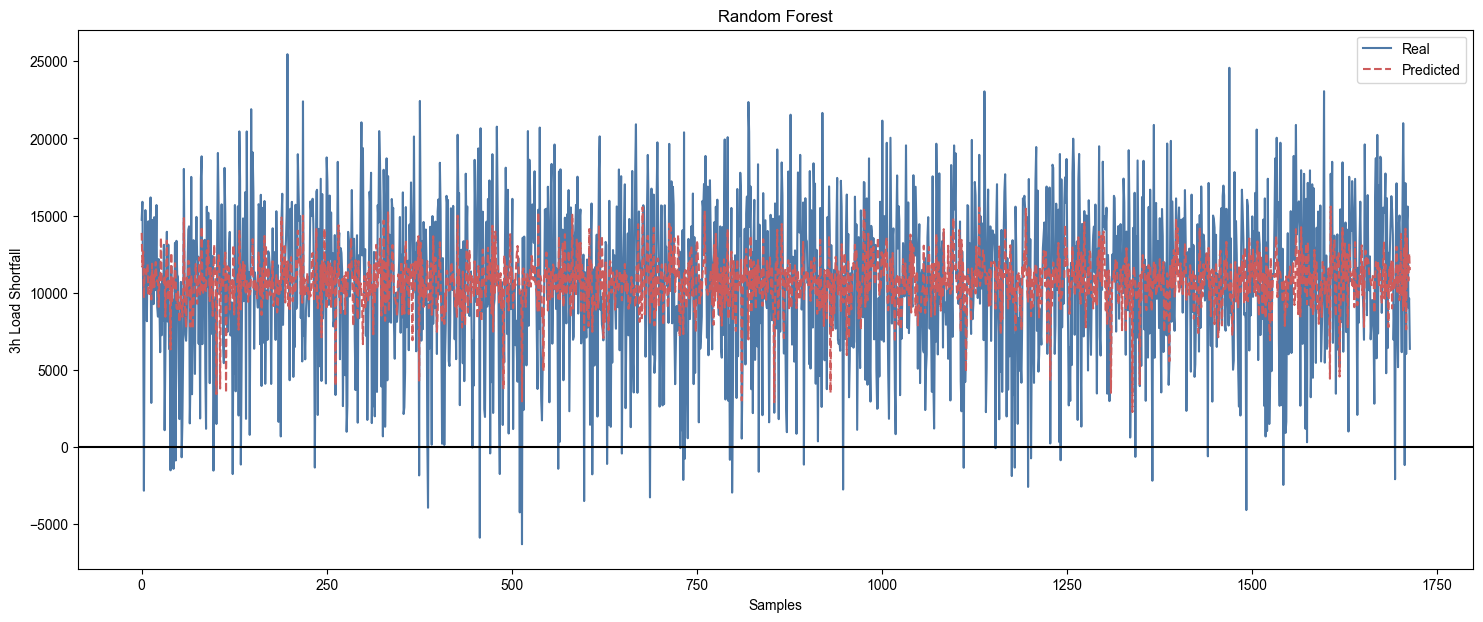

In [23]:
comparisson(y_test, Y_test_RF_1, 'Random Forest',(18,7))